# Задание

Hассматривается система, поведение которой нужно предсказать на основе входных данных и наблюдаемых выходов - система предсказания отклика пользователя на веб-сайте. На вход подаются параметры "возраст пользователя", "количество просмотров страниц", "среднее время нахождения на сайте". Требуется спрогнозировать вероятность отклика пользователя (например, клик по рекламе).

# Таблица исходных данных

| Возраст | Просмотры страниц | Время на сайте (мин.) | Отклик (1 - клик, 0 - нет) |
|:-------:|:-----------------:|:---------------------:|:--------------------------:|
|25|5|10|1|
|35|3|8|0|
|45|4|9|1|
|30|2|7|0|
|40|6|11|1|




# Решение

Модель черного ящика может быть аппроксимирована в виде линейной функции:
$$y={𝛽_{0}}+{{𝛽_{1}}*{x_{1}}}+{{𝛽_{2}}*{x_{2}}}+{{𝛽_{3}}*{x_{3}}}$$ 
где:

- $y$ — предсказанный отклик (вероятность клика),
- $x_{1}$ — возраст,
- $x_{2}$ — количество просмотров страниц,
- $x_{3}$ — время на сайте.

Для решения задачи построим модель линейной регрессии с применением машинного обучения.

Схема модели имеет вид:

+------------------------------+
| Ввод исходных данных x{1...3}|<<-----------------------------------
+------------------------------+                                     |
                |                                                    |
                v                                                    |
+---------------------------------+    +-------------------------+   |
| Инициализация модели прогноза y |<---|     Внешние факторы     |   |
+---------------------------------+    +-------------------------+   |
                |                                                    |
                v                                                    |   
              +--------------------------------------------------------+
              |                   Прогнозные значения y                |
              +--------------------------------------------------------+

# Последовательность решения

1. Используем метод линейной регрессии для нахождения коэффициентов $𝛽_{0}$, $𝛽_{1}$, $𝛽_{2}$, $𝛽_{3}$.
2. Строим таблицу с компонентами модели.
3. Выводим график, который показывает, как модель прогнозирует отклик на основе входных данных.

Модель отклика: y = -1.59 + 0.01 * Возраст + 0.15 * Просмотры страниц + 0.15 * Время на сайте

Таблица компонентов модели:
                    Компонент  Значение
0           Смещение (beta_0) -1.587500
1            Возраст (beta_1)  0.008333
2  Просмотры страниц (beta_2)  0.145833
3     Время на сайте (beta_3)  0.145833


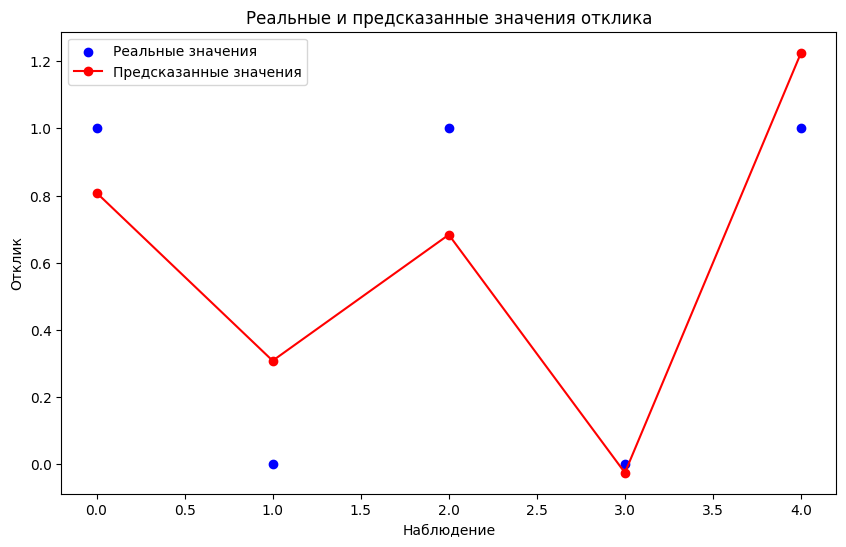

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Данные (входы и выходы)
data = {
    'Возраст': [25, 35, 45, 30, 40],
    'Просмотры страниц': [5, 3, 4, 2, 6],
    'Время на сайте': [10, 8, 9, 7, 11],
    'Отклик': [1, 0, 1, 0, 1]
}

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

# Определяем входные параметры (X) и выход (y)
X = df[['Возраст', 'Просмотры страниц', 'Время на сайте']]
y = df['Отклик']

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на данных
model.fit(X, y)

# Получаем коэффициенты модели
beta_0 = model.intercept_
beta_1, beta_2, beta_3 = model.coef_

# Вывод формулы модели
print(f"Модель отклика: y = {beta_0:.2f} + {beta_1:.2f} * Возраст + {beta_2:.2f} * Просмотры страниц + {beta_3:.2f} * Время на сайте")

# Таблица компонентов модели
coefficients = {
    'Компонент': ['Смещение (beta_0)', 'Возраст (beta_1)', 'Просмотры страниц (beta_2)', 'Время на сайте (beta_3)'],
    'Значение': [beta_0, beta_1, beta_2, beta_3]
}
coeff_df = pd.DataFrame(coefficients)
print("\nТаблица компонентов модели:")
print(coeff_df)

# Прогнозируем значения отклика для обучающей выборки
y_pred = model.predict(X)

# Визуализация реальных и предсказанных откликов
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Реальные значения')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Предсказанные значения', marker='o')
plt.xlabel('Наблюдение')
plt.ylabel('Отклик')
plt.title('Реальные и предсказанные значения отклика')
plt.legend()
plt.show()

# Анализ результатов (пример)
Интерпретация значений компонентов модели:
- $𝛽_{0}=-1,59$ - это базовый уровень вероятности отклика, когда все входные параметры равны нулю;
- $𝛽_{1}=0,008$ - с увеличением возраста на 1 год вероятность отклика увеличивается на 0,8%;
- $𝛽_{2}=0,15$ - увеличение количества просмотров страниц на 1 уменьшает вероятность отклика на 15%;
- $𝛽_{3}=-0,15$ - увеличение времени на сайте на 1 минуту уменьшает вероятность отклика на 15%.